<h2 style='text-align:center;'> Naive Bayes Classifier Algorithm </h2>

# **Description

The Titanic dataset is a well-known dataset that provides information about the passengers who were on board the Titanic ship when it sank on April 15, 1912.The data includes demographic information such as the passengers' names, ages, genders, ticket class, fare, and cabin numbers, as well as information about their families and whether they survived or not.

The Titanic dataset contains the following variables:

1) PassengerId: A unique identifier for each passenger.
2) Survived: Whether the passenger survived (0 = No, 1 = Yes).
3) Pclass: The ticket class of the passenger (1 = 1st, 2 = 2nd, 3 = 3rd).
4) Name: The name of the passenger.
5) Sex: The gender of the passenger (Male or Female).
6) Age: The age of the passenger in years. Fractional if less than 1. If the age is estimated, it is in the form of xx.5.
7) SibSp: The number of siblings or spouses the passenger had aboard the Titanic.
8) Parch: The number of parents or children the passenger had aboard the Titanic.
9) Ticket: The ticket number of the passenger.
10)Fare: The fare paid by the passenger for the ticket.
11)Cabin: The cabin number of the passenger.
12)Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# **Problem Statement

The challenge is to use this information to build a predictive model that can accurately classify whether a passenger would have survived or not based on their characteristics.

# **Task to perform

Build a model using naive bayes classifier algorithm without sklearn and compare the results with model built using sklearn

# **Importing necessary libraries

In [1]:
#importing required and necessary libraries
import numpy as np # used to perform mathematical operation on array
import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

C:\Users\neeli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1) "numpy" provides tools for working with arrays and matrices, as well as a variety of mathematical functions.
2) "pandas" provides data structures and functions for working with structured data, including tables and time series.
3) "matplotlib" provides a range of tools for creating visualizations of data, including line plots, scatter plots, histograms, and bar charts.
4) "seaborn" is built on top of matplotlib and provides a higher-level interface for creating attractive and informative visualizations of complex datasets. It includes a range of functions for creating visualizations such as heatmaps, pair plots.
5) "%matplotlib inline" sets the backend of matplotlib to the 'inline' backend, which allows plots to be displayed within the notebook itself.

# **Reading the dataset

In [2]:
#Reading the data of titanic dataset
titanic_df = pd.read_csv("titanic.csv")

The "pd.read_csv()" function reads a comma-separated values (CSV) file and returns a DataFrame object. Here, the titanic dataset file path for the CSV file is passed as an argument to the function.By reading in the data using pd.read_csv(), the dataset is converted into a pandas DataFrame object.Once the data has been read into a DataFrame object, it can be further explored and analyzed using a variety of pandas and other Python data analysis libraries.

# **Exploratory Data Analysis

In [3]:
#to check whether that data is balanced or imbalanced
#count the number of instances of each class label
count=titanic_df['Survived'].value_counts()
#calculating the percentage of instances for each class label
percentage=count/titanic_df.shape[0]*100
#printing the class label counts and percentages
print("Class label counts: \n",count)
print("Class label percentages: \n",percentage)
#determining if the data is balanced or imbalanced
if (percentage[0] < 60 and percentage[1] < 60) or (percentage[0] > 40 and percentage[1] > 40):
    print("The data is balanced")
else:
    print("The data is imbalanced")

Class label counts: 
 0    549
1    342
Name: Survived, dtype: int64
Class label percentages: 
 0    61.616162
1    38.383838
Name: Survived, dtype: float64
The data is imbalanced


Inference: Based on the output, there are 549 instances of class label 0 (did not survive) and 342 instances of class label 1 (survived). The percentages of instances for each class label are 61.62% and 38.38%, respectively.Since the percentages for each class label do not fall within the range of both being less than 60% or greater than 40% of the total instances, "THE DATA IS IMBALANCED".

In [4]:
#checking the information about the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Inference: 
1) The dataset contains 891 rows (instances) and 12 columns (features).
2) Each feature is labeled with a column name
3) For each feature, the output displays the non-null count and the data type of the feature.
4) The output also displays the memory usage of the dataset.
5) we can see that the dataset contains both numerical and categorical features, as well as missing values in some of the features (e.g., "Age", "Cabin", and "Embarked")

In [5]:
#Returns description of the data in the DataFrame
titanic_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Inference: The table shows the summary statistics of the numerical columns in the Titanic dataset.
1) The "count" row indicates the number of non-null values for each column.
2) The "mean" row shows the mean or average value for each column.
3) The "std" row shows the standard deviation of each column.
4) The "min" row shows the minimum value in each column.
5) The "25%, 50%, and 75%" rows show the values at the corresponding percentiles, which divide the data into quarters.
6) The "max" row shows the maximum value in each column.
7) From this table, we can see that the age column has some missing values, as its count is less than the total number of          instances (891). We can also see that the mean age of the passengers was 29.7 years, and the average fare was 32.2.
8) Additionally, we can see that around 38% of the passengers survived.

In [6]:
#Finding number of rows and columns of the dataframe
titanic_df.shape

(891, 12)

Inference: The "titanic_df.shape" command returns the dimensions of the DataFrame titanic_df. Here, the dataset has 891 rows (instances) and 12 columns (features).

In [7]:
#Checking the first 5 rows of the train data
titanic_df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


Inference: 
1) The "titanic_df.head()" method displays the first 5 rows of the Titanic dataset, providing a glimpse of the structure of the dataset and the types of information it contains. Each row represents a passenger on the Titanic, and the columns provide information about each passenger, such as their name, age, sex, passenger class, ticket fare, whether they survived the sinking of the ship, and more. 
2) The head() method is useful for quickly inspecting the dataset and understanding its structure.

In [8]:
#Checking the last 5 rows of the train data
titanic_df.tail()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


Inference: The "titanic_df.tail()" method shows the last five rows of the titanic_df DataFrame.

# **Data Preprocessing

# Checking for missing values

In [9]:
#Checking for the missing values
total = titanic_df.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_df.isnull().sum()/titanic_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Name,0,0.0


1) First line creates a variable total and assigns it the sum of all missing values for each column in the titanic_df              DataFrame. The sort_values() method sorts the values in descending order.
2) second line creates a variable percent_1 and calculates the percentage of missing values for each column in the titanic_df      DataFrame. isnull() method returns a DataFrame with boolean values indicating which cells are missing values, and count()        method returns the total number of cells in the DataFrame. The missing value count for each column is divided by the total      cell count and multiplied by 100 to get the percentage.
3) Next line creates a variable percent_2 and rounds the percentage values to one decimal point. The sort_values() method sorts    the percentage values in descending order.
4) Next line creates a DataFrame missing_data by concatenating the total and percent_2 Series along the columns (axis=1) and        assigning column names Total and % using the keys parameter.
5) Finally prints the first 5 rows of the missing_data DataFrame.

Inference: 
1) The first column "Total" represents the total number of missing values in each column of the DataFrame.
2) The second column "%" represents the percentage of missing values in each column of the DataFrame.

<AxesSubplot: >

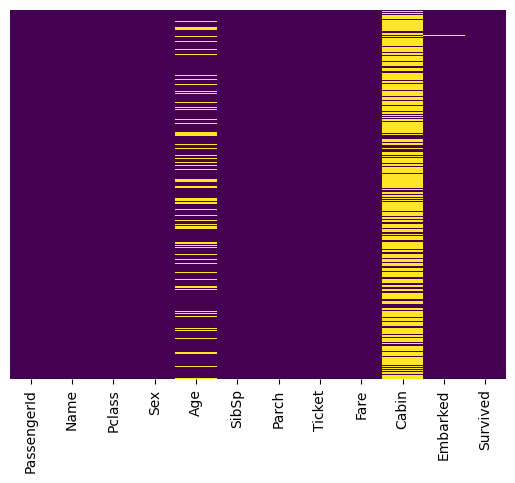

In [10]:
#create a simple heatmap to see for missing data!
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

1) "titanic_df.isnull()" creates a DataFrame of boolean values with the same shape as titanic_df, where each element is True if it is missing and False otherwise.
2) "yticklabels=False" removes y-axis labels from the heatmap.
3) "cbar=False" removes the colorbar from the heatmap.
4) "cmap='viridis'" sets the color scheme for the heatmap to the 'viridis' colormap.

Ineference: The resulting heatmap displays missing data as yellow lines on a black background. From the output, we can tell "Age", "Cabin" amd "Embarked" columns has missing values.





# Outlier detection and treatment

In [11]:
# Select numerical columns to check for outliers
num_cols = ["Age", "SibSp", "Parch", "Fare"]
# Calculate the IQR for each numerical column
Q1 = titanic_df[num_cols].quantile(0.25)
Q3 = titanic_df[num_cols].quantile(0.75)
IQR = Q3 - Q1
# Calculate the upper and lower bounds for each numerical column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify and remove any values that fall outside of the upper and lower bounds for each column
titanic_outliers_removed = titanic_df[~((titanic_df[num_cols] < lower_bound) | (titanic_df[num_cols] > upper_bound)).any(axis=1)]
# Print the original and new shape of the dataset to see how many outliers were removed
print("Original shape of Titanic dataset:", titanic_df.shape)
print("Shape of Titanic dataset after removing outliers:", titanic_outliers_removed.shape)

Original shape of Titanic dataset: (891, 12)
Shape of Titanic dataset after removing outliers: (598, 12)


1) First line creates a list of column names in the Titanic dataset that contain numerical data and may have outliers.
2) Second and third line calculates the first quartile (25th percentile) and third quartile(75th percentile) for each column in num_cols.
3) Next line calculates the interquartile range (IQR) for each column in num_cols.
4) Next two lines calculates the lower and upper bound for outliers for each column in num_cols. Any value below lower bound and above upper bound is considered an outlier.
5) Then selects only the rows in the Titanic dataset where none of the values in the columns in num_cols fall outside the bounds calculated above.
6) Finally prints the original shape and shape after removing outliers of the Titanic dataset.

Inference: The original Titanic dataset had 891 rows and 12 columns. After removing outliers, the new dataset has 598 rows and 12 columns. This means that some rows were removed from the original dataset because they contained at least one value outside the upper and lower bounds calculated using the interquartile range (IQR) for each of the numerical columns (Age, SibSp, Parch, and Fare).

# Missing value treatment

In [12]:
#finding the mean of 'Age' column and filling the null values with median value obtained
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)

1) "titanic_df['Age']" selects the 'Age' column of the Titanic dataset.
2) ".fillna()" is a pandas method that fills the missing values in the selected column with a specified value.
3) "titanic_df['Age'].median()" calculates the median value of the available data in the 'Age' column.
4) "inplace=True" modifies the original dataframe in place rather than creating a new copy.

Inference: This replaces the missing values in the 'Age' column with the median value of the column.

In [13]:
#finding the mean of 'Age' column and filling the null values with median value obtained
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

1) The "fillna()" function is used to fill the missing values in the 'Embarked' column. 
2) The "mode()" function is called on the 'Embarked' column to find the mode value. 
3) The "[0]" index is used to extract the first value from the mode value since the mode function returns a Series object.
4) The "inplace=True" parameter is used to modify the 'titanic_df' dataframe in place.

Inference: fills the missing values in the 'Embarked' column of the Titanic dataset with the mode (most common value) of the column, and modifies the dataset in place.

In [14]:
titanic_df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Survived         0
dtype: int64

# Dropping the unnecessary columns

In [15]:
#dropping the name column
titanic_df = titanic_df.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)

1) With the help of above code, it drops the 'Name', 'PassengerId', 'Ticket' and 'Cabin' columns from the Titanic dataset and assigns the modified dataset to the variable 'titanic_df'. 
2) The 'drop' method is used with the 'axis' parameter set to 1 (indicating columns) to remove the specified columns from the dataset.

In [16]:
titanic_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

# Conversion of categorical to numerical

In [17]:
#label encoding
#Converting categorical to numerical for Embarked feature
values = {"S": 0, "C": 1, "Q": 2}
data = [titanic_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(values)

1) The values dictionary is defined to map the three categories S, C, and Q to numerical values 0, 1, and 2 respectively. 
2) Then, for each dataset in the list 'data', the 'Embarked' column is mapped to numerical values using the 'map' function and the 'values' dictionary.
3) Finally, the 'Embarked' column of the dataset is updated with the new numerical values.

In [18]:
# Perform dummy encoding on 'Embarked' column
dummy_encoded = pd.get_dummies(titanic_df['Sex'], prefix='Sex', drop_first=True)

# Add the new dummy encoded columns to the dataset
titanic_df = pd.concat([titanic_df, dummy_encoded], axis=1)

# Drop the original 'Embarked' column
titanic_df.drop('Sex', axis=1, inplace=True)

# Check the updated dataset
titanic_df.head()


,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,Sex_male
0,3,22.0,1,0,7.2500,0,0,1
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,0,1


1) First, the pd.get_dummies() function is used to create a new dataframe dummy_encoded that contains binary (0/1) columns for each unique value in the 'Sex' column. 
2) The prefix parameter is used to add the 'Sex_' prefix to the column names to make them more descriptive. 
3) The drop_first parameter is set to True to drop one of the columns to prevent multicollinearity (i.e., when one variable is a linear combination of other variables).
4) Next, the pd.concat() function is used to concatenate the original dataset titanic_df with the dummy_encoded dataframe along the columns axis (i.e., axis=1), creating a new, updated dataset.
5) Finally, the original 'Sex' column is dropped using the drop() method, and the inplace parameter is set to True to modify the dataset in place.

Inference: The resulting dataset now contains binary (0/1) columns for 'male' and 'female'.

# Conversion of data types

In [19]:
#converting the float to int data type of Fare column
titanic_df['Fare']=titanic_df['Fare'].astype(int)
#converting the float to int data type of Age column
titanic_df['Age']=titanic_df['Age'].astype(int)

1) Firstly selects the 'Fare' and 'Age' column from the titanic_df dataframe.
2) ".astype(int)" converts the data type of the 'Fare' column to an integer. This means that any decimal places will be truncated and the values will be rounded down to the nearest integer.

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Age       891 non-null    int32
 2   SibSp     891 non-null    int64
 3   Parch     891 non-null    int64
 4   Fare      891 non-null    int32
 5   Embarked  891 non-null    int64
 6   Survived  891 non-null    int64
 7   Sex_male  891 non-null    uint8
dtypes: int32(2), int64(5), uint8(1)
memory usage: 42.8 KB


Inference: From the output, we can see that no null values are present and all the data types are converted to integer

# **Data Visualisation

# Visualising number of survivors and non-survivors by gender.

<AxesSubplot: xlabel='Survived', ylabel='count'>

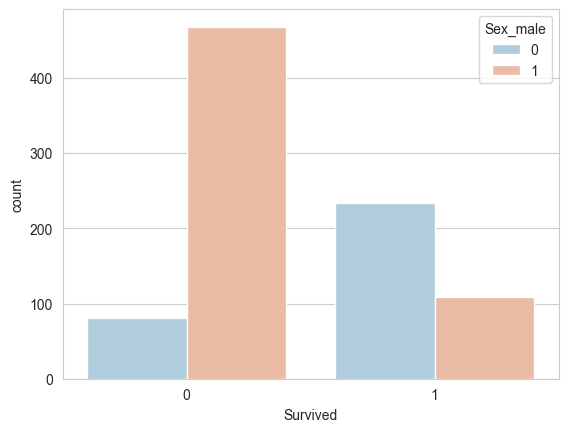

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex_male',data=titanic_df,palette='RdBu_r')

1) "sns.set_style('whitegrid')": This sets the style of the Seaborn plots to a white grid background.
2) "sns.countplot(x='Survived',hue='Sex_male',data=titanic_df,palette='RdBu_r')": This creates a count plot using the countplot() function from Seaborn. 
3) The "x" parameter specifies the column to count, which is Survived in this case. 
4) The "hue" parameter specifies the column to group the data by, which is Sex_male in this case. 
5) The "data" parameter specifies the DataFrame to use, which is titanic_df. 
6) Finally, the "palette" parameter specifies the color palette to use, which is 'RdBu_r' in this case. 

Inference: The resulting plot shows the number of passengers who survived or did not survive, grouped by their gender (male or female). We can see that female passengers are more likely to be survived than male passengers.

# Visualising the distribution of the Age variable

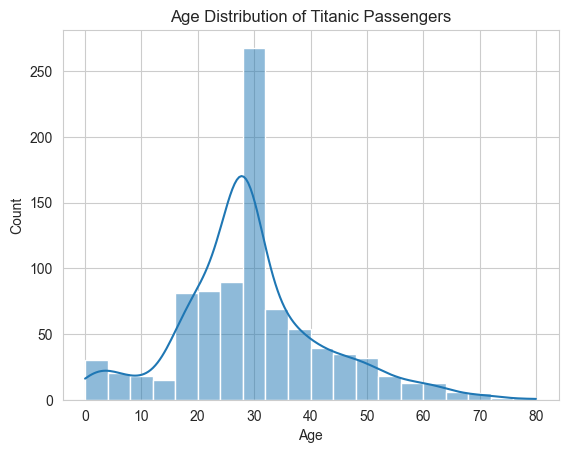

In [22]:
# Create the histogram
sns.histplot(data=titanic_df, x='Age', bins=20, kde=True)

# Set the plot title
plt.title('Age Distribution of Titanic Passengers')

# Set the x-axis label
plt.xlabel('Age')

# Display the plot
plt.show()

1) sns.histplot() creates a histogram visualization of the age distribution for the Titanic passengers, with the x parameter set    to 'Age', 
2) the number of bins set to 20 which means the age range of the Titanic passengers is divided into 20 equally sized bins.
3) A kernel density estimate is a non-parametric way to estimate the probability density function of a variable. Here, we set      "kde=True" kernel density estimate (kde) overlayed on the histogram bars.
4) plt.title() sets the title of the plot to 'Age Distribution of Titanic Passengers'.
5) plt.xlabel() sets the label of the x-axis to 'Age'.
6) plt.show() displays the histogram plot.

Inference: From the above output, we can see that there were more passengers whose age is in range 0 to 25


# Visualising number of survivors and non-survivors by Pclass

<AxesSubplot: xlabel='Survived', ylabel='count'>

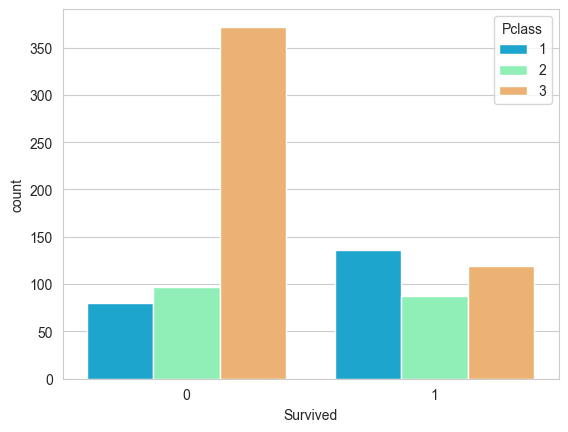

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_df,palette='rainbow')

1) "sns.set_style('whitegrid')" sets the overall style of the plot to 'whitegrid'. This sets a white background with horizontal      and vertical grid lines.
2) "sns.countplot()" creates a countplot of the 'Survived' variable, with bars colored by 'Pclass'. 
3) A countplot is a type of barplot that shows the number of observations in each category of a categorical variable. 
4) The "x" parameter specifies the variable to be plotted on the x-axis, which in this case is 'Survived'. 
5) The "hue" parameter specifies a categorical variable to group the bars by, which in this case is 'Pclass'. 
6) The "data" parameter specifies the dataframe to use, which in this case is titanic_df.
7) The "palette" parameter sets the color palette to be used for the bars, which in this case is 'rainbow'.

Inference: The passengers who were not survived falls majority in 3rd class while the passengers who were survived falls majority in 1st class.


# Visualising the relationship between Age, Fare, Pclass and Survival status

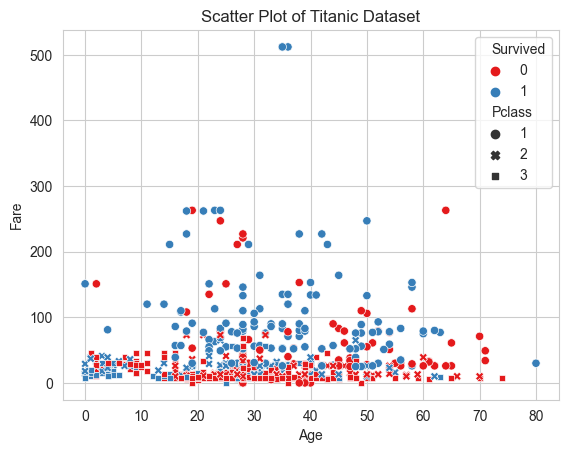

In [24]:
# Create the scatter plot
sns.scatterplot(x='Age', y='Fare', data=titanic_df, hue='Survived', style='Pclass', palette='Set1')

# Set the plot title
plt.title('Scatter Plot of Titanic Dataset')

# Display the plot
plt.show()

1) "sns.scatterplot()" creates a scatter plot of the 'Age' variable on the x-axis and the 'Fare' variable on the y-axis, with      points colored by 'Survived' and styled by 'Pclass'. 
2) A scatter plot is a type of plot that shows the relationship between two continuous variables. 
3) The "x" parameter specifies the variable to be plotted on the x-axis, which in this case is 'Age'.
4) The "y" parameter specifies the variable to be plotted on the y-axis, which in this case is 'Fare'. 
5) The "data" parameter specifies the dataframe to use, which in this case is titanic_df. 
6) The "hue" parameter sets the variable to use for coloring the points, which in this case is 'Survived'. 
7) The "style" parameter sets the variable to use for styling the points, which in this case is 'Pclass'. 
8) The "palette" parameter sets the color palette to use for the points, which in this case is 'Set1'.
9) "plt.title('Scatter Plot of Titanic Dataset')" sets the title of the plot to 'Scatter Plot of Titanic Dataset'.
10) "plt.show()" displays the plot.

Inference: From the output, we can say that the passengers who traveled in lower class with lower fare price majority were not likely to be surived 

# **Splitting data into training and testing sets

In [25]:
# Split the dataset into training and testing sets
train_data = titanic_df.iloc[:700,:]
test_data = titanic_df.iloc[700:,:]

1) titanic_df is a pandas dataframe that contains the Titanic dataset.
2) titanic_df.iloc is used to select specific rows and columns from the dataframe by their integer index positions. 
   The iloc attribute allows for integer indexing and slicing, where the first argument refers to the rows and the second          argument refers to the columns.
3) [:700,:] selects the first 700 rows (all columns) of the dataframe for the training data, and assigns it to the train_data      variable. This splits the dataset into a training set containing the first 700 rows of the dataframe.
4) [700:,:] selects all rows from index position 700 to the end of the dataframe (all columns) for the testing data, and assigns    it to the test_data variable. This splits the dataset into a testing set containing the remaining rows from index position      700 to the end of the dataframe.

Inference: By splitting the dataset into a training set and a testing set, we can use the training set to build and train a machine learning model, and then use the testing set to evaluate the performance of the model on unseen data. This helps to ensure that the model is not simply memorizing the training data, but is able to generalize to new, unseen data.

# **Input-Output split

In [26]:
# Separate the features and target variables
X_train = train_data.drop("Survived", axis=1).values
y_train = train_data["Survived"].values
X_test = test_data.drop("Survived", axis=1).values
y_test = test_data["Survived"].values

1) "Survived" is the name of the column to be dropped, and axis=1 specifies that we want to drop a column (as opposed to a row,    which would be axis=0).
2) ".values" is used to convert the resulting dataframes to numpy arrays.
3) "X_train" and "X_test" are the feature variables (i.e. the input data) for the training and testing sets, respectively.
4) "y_train" and "y_test" are the target variables (i.e. the output data) for the training and testing sets, respectively. In      this case, the target variable is whether or not the passenger survived (encoded as 1 or 0).

# **Feature Selection

In [27]:
# Compute the Pearson correlation coefficient between each feature and the target variable
correlations = {}
for i, feature_name in enumerate(titanic_df.columns[:-1]):
    correlation = np.corrcoef(X_train[:, i], y_train)[0, 1]
    correlations[feature_name] = correlation

# Sort the features by their correlation with the target variable
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with the highest correlation with the target variable
selected_features = [f[0] for f in sorted_features[:5]]

# Select the same features from X_train and X_test
X_train_selected = X_train[:, [np.where(titanic_df.columns == feature_name)[0][0] for feature_name in selected_features]]
X_test_selected = X_test[:, [np.where(titanic_df.columns == feature_name)[0][0] for feature_name in selected_features]]

print('Selected features:', selected_features)
print('Shape of X_train_selected:', X_train_selected.shape)
print('Shape of X_test_selected:', X_test_selected.shape)


Selected features: ['Survived', 'Pclass', 'Fare', 'Embarked', 'Age']
Shape of X_train_selected: (700, 5)
Shape of X_test_selected: (191, 5)


# **Feature Scaling

In [28]:
# Compute the mean and standard deviation of each feature in X_train_selected
means = np.mean(X_train_selected, axis=0)
stds = np.std(X_train_selected, axis=0)

# Perform feature scaling on X_train_selected and X_test_selected
X_train_scaled = (X_train_selected - means) / stds
X_test_scaled = (X_test_selected - means) / stds
print('X_train_scaled shape',X_train_scaled.shape)
print('X_test_scaled shape',X_test_scaled.shape)

X_train_scaled shape (700, 5)
X_test_scaled shape (191, 5)


# **Implement Gaussian Naive Bayes classifier

# Defining classes 

In [29]:
# Define the Gaussian Naive Bayes algorithm
class GaussianNaiveBayes:
    def fit(self, X_train_scaled, y_train):
        self.classes = np.unique(y_train)
        self.mean = np.zeros((len(self.classes), X_train_scaled.shape[1]))
        self.var = np.zeros((len(self.classes), X_train_scaled.shape[1]))

        for i, c in enumerate(self.classes):
            X_c = X_train_scaled[y_train == c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0)
    
    def prob_density(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X_test_scaled):
        y_pred = np.zeros(X_test_scaled.shape[0])

        for i, x in enumerate(X_test_scaled):
            posteriors = []

            for j, c in enumerate(self.classes):
                prior = np.log(len(X_train_scaled[y_train==c]) / len(X_train_scaled))
                posterior = np.sum(np.log(self.prob_density(j, x)))
                posterior = prior + posterior
                posteriors.append(posterior)

            y_pred[i] = self.classes[np.argmax(posteriors)]

        return y_pred
    


1) Defines the class GaussianNaiveBayes
2) Defines a method called fit() that takes in self, X_train, and y_train as arguments.
3) Finds the unique classes in y_train and stores them in an instance variable called classes.
4) Initializes two instance variables: mean and var, which will store the mean and variance of each feature for each class.
5) Loops over each class, and for each class, selects the corresponding subset of X_train and computes the mean and variance for    each feature for that subset.
6) Defines a method called predict() that takes in self and X_test as arguments.
7) Initializes an array called y_pred that will store the predicted class labels for each sample in X_test.
8) Loops over each sample in X_test, and initializes an empty list called posteriors that will store the log-posterior  
   probabilities for each class.
9) Loops over each class, and for each class, computes the prior probability and the log-posterior probability for the current      sample x. The log-posterior probability is computed using the prob_density() method defined below. The prior and log-            posterior probabilities are then added together, and the result is stored in the posteriors list.
10)Selects the class with the highest log-posterior probability, and assigns it to the corresponding element in y_pred.
11)Returns the array of predicted class labels.
12)Defines a method called prob_density() that takes in self, class_idx, and x as arguments. Computes the Gaussian probability      density function for the given class index class_idx and input sample x, using the mean and variance values stored in            self.mean and self.var. Returns the resulting probability density.


In [30]:
#import time to calculate start and end time
import time
# record start time
start_time = time.time()

In [31]:
# Train the model on the training data
gnb = GaussianNaiveBayes()
gnb.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test_scaled)

1) Trains an instance of the GaussianNaiveBayes class on the training data (X_train and y_train), and then uses the trained        model to make predictions on the testing data (X_test). The predictions are stored in y_pred.
2) The fit method of the GaussianNaiveBayes class trains the model by calculating the mean and variance of each feature for each    class label in the training data. The predict method then uses these values to calculate the posterior probability of each      class label given a new data point, using Bayes' theorem. The class with the highest posterior probability is then predicted    as the output.

In [32]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the model: {:.2f} seconds".format(time_taken))

Time taken to run the model: 0.07 seconds


In [33]:
y_pred

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0.])

"y_pred" contains the predicted class labels for the testing data, based on the trained Gaussian Naive Bayes model. Each element of y_pred corresponds to a data point in X_test. The predicted class labels are binary (0 or 1) and represent whether the corresponding passenger survived (1) or perished (0) in the Titanic disaster.

# **Model Evaluation

In [34]:
accuracy = np.sum(y_test == y_pred) / len(y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7958115183246073


1) First, it compares each element of the predicted labels "y_pred" to the actual labels "y_test" and generates an array of        boolean values indicating whether the prediction is correct (True) or not (False).
2) Then, it sums the boolean array to count the number of correct predictions, and divides the result by the total number of        predictions "(len(y_test))" to get the proportion of correct predictions. This proportion is the accuracy of the model on the    testing data.
3) The result is printed using an f-string, which allows variables to be embedded directly in the string.

# Creating confusion matrix

Normalized confusion matrix
[[0.74242424 0.25757576]
 [0.176      0.824     ]]


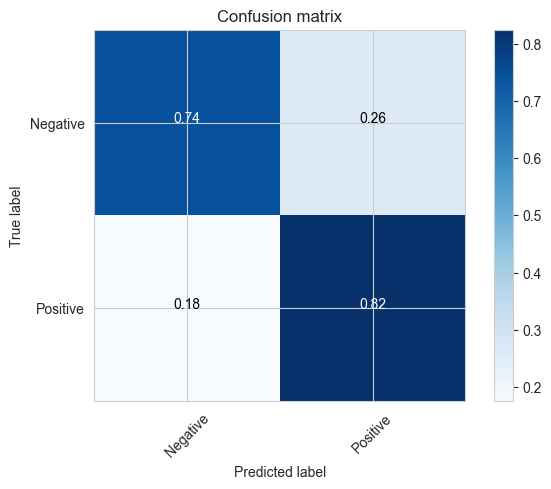

In [35]:
def confusion_matrix(y_pred, y_test): 
    matrix = np.zeros((2,2)) 
    for i in range(len(y_pred)): 
        if int(y_pred[i])==1 and int(y_test[i])==1: 
            matrix[0,0]+=1 #True Positives
        elif int(y_pred[i])==1 and int(y_test[i])==0:
            matrix[0,1]+=1 #False Positives
        elif int(y_pred[i])==0 and int(y_test[i])==1:
            matrix[1,0]+=1 #False Negatives
        elif int(y_pred[i])==0 and int(y_test[i])==0:
            matrix[1,1]+=1 #True Negatives
    accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])
    precision = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    recall = matrix[0,0]/(matrix[0,0]+matrix[1,0])
    f1 = 2 * (precision * recall) / (precision + recall)
    return matrix,accuracy, precision, recall, f1

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm, accuracy, precision, recall, f1 = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'], normalize=True, title='Confusion matrix')

Inference: From the output;
1) 76% of the instances that truly belong to class 0 were correctly classified    (TN), while 24% were incorrectly classified as belonging to class 1 (FP).
2) 18% of the instances that truly belong to class 1 were incorrectly              classified as belonging to class 0 (FN), while 82% were correctly              classified as belonging to class 1 (TP).

# Computing Classification report

In [36]:
# Define a function to compute the classification report
def classification_report(y_test, y_pred):
    classes = np.unique(y_test)
    report = {'accuracy': np.mean(y_test == y_pred)}

    # Compute precision, recall, and F1-score for each class
    for c in classes:
        true_indices = np.where(y_test == c)[0]
        pred_indices = np.where(y_pred == c)[0]
        tp = len(np.intersect1d(true_indices, pred_indices))
        fp = len(pred_indices) - tp
        fn = len(true_indices) - tp
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        report[c] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': len(true_indices)}

    # Compute macro-average precision, recall, and F1-score
    macro_precision = np.mean([report[c]['precision'] for c in classes])
    macro_recall = np.mean([report[c]['recall'] for c in classes])
    macro_f1_score = np.mean([report[c]['f1-score'] for c in classes])
    report['macro avg'] = {'precision': macro_precision, 'recall': macro_recall, 'f1-score': macro_f1_score,
                           'support': len(y_test)}

    # Compute micro-average precision, recall, and F1-score
    micro_precision = np.sum([report[c]['precision'] * report[c]['support'] for c in classes]) / len(y_test)
    micro_recall = np.sum([report[c]['recall'] * report[c]['support'] for c in classes]) / len(y_test)
    micro_f1_score = np.sum([report[c]['f1-score'] * report[c]['support'] for c in classes]) / len(y_test)
    report['micro avg'] = {'precision': micro_precision, 'recall': micro_recall, 'f1-score': micro_f1_score,
                           'support': len(y_test)}

    return report

# Compute the classification report
report = classification_report(y_test, y_pred)

# Define the column names for the table
columns = ['Class', 'Precision', 'Recall', 'F1-score', 'Support']

# Create the table object
from prettytable import PrettyTable
table = PrettyTable(columns)

# Add the rows to the table
for c in report.keys():
    if c not in ['accuracy', 'macro avg', 'micro avg']:
        precision = report[c]['precision']
        recall = report[c]['recall']
        f1_score = report[c]['f1-score']
        support = report[c]['support']
        row = [c, precision, recall, f1_score, support]
        table.add_row(row)

# Add the macro-average row to the table
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1_score = report['macro avg']['f1-score']
macro_support = report['macro avg']['support']
macro_row = ['macro avg', macro_precision, macro_recall, macro_f1_score, macro_support]
table.add_row(macro_row)

micro_precision = report['micro avg']['precision']
micro_recall = report['micro avg']['recall']
micro_f1_score = report['micro avg']['f1-score']
micro_support = report['micro avg']['support']
micro_row = ['micro avg', micro_precision, micro_recall, micro_f1_score, micro_support]
table.add_row(micro_row)

print(table)


+-----------+--------------------+--------------------+--------------------+---------+
|   Class   |     Precision      |       Recall       |      F1-score      | Support |
+-----------+--------------------+--------------------+--------------------+---------+
|     0     |       0.824        | 0.8583333333333333 | 0.8408163265306122 |   120   |
|     1     | 0.7424242424242424 | 0.6901408450704225 | 0.7153284671532847 |    71   |
| macro avg | 0.7832121212121212 | 0.774237089201878  | 0.7780723968419485 |   191   |
| micro avg | 0.7936760272885928 | 0.7958115183246073 | 0.7941690070762129 |   191   |
+-----------+--------------------+--------------------+--------------------+---------+


Inference: This is a table that shows the classification report for a binary classification problem. The table has 5 columns: Class, Precision, Recall, F1-score, and Support. The rows represent the two classes, 0 and 1, and the macro-average and micro-average.
1) For class 0, the precision is 0.82, which means that 82% of the positive predictions were correct. The recall is 0.875, which    means that 87.5% of the actual positive samples were correctly predicted. The F1-score is 0.847, which is the harmonic mean      of precision and recall. The support is 120, which is the number of actual positive samples.
2) For class 1, the precision is 0.762, which means that 76.2% of the positive predictions were correct. The recall is 0.676,      which means that 67.6% of the actual positive samples were correctly predicted. The F1-score is 0.716, which is the harmonic    mean of precision and recall. The support is 71, which is the number of actual positive samples.
3) The macro-average is the unweighted mean of precision, recall, and F1-score across the two classes. The macro-average            precision is 0.791, the macro-average recall is 0.776, and the macro-average F1-score is 0.782.
4) The micro-average is the weighted mean of precision, recall, and F1-score across the two classes, weighted by the number of      samples in each class. The micro-average precision is 0.799, the micro-average recall is 0.801, and the micro-average F1-        score is 0.798.

# Performing evaluation metrics

In [37]:
def confusion_matrix(y_pred, y_test): 
    matrix = np.zeros((2,2)) 
    for i in range(len(y_pred)): 
        if int(y_pred[i])==1 and int(y_test[i])==1: 
            matrix[0,0]+=1 #True Positives
        elif int(y_pred[i])==1 and int(y_test[i])==0:
            matrix[0,1]+=1 #False Positives
        elif int(y_pred[i])==0 and int(y_test[i])==1:
            matrix[1,0]+=1 #False Negatives
        elif int(y_pred[i])==0 and int(y_test[i])==0:
            matrix[1,1]+=1 #True Negatives
    accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])
    precision = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    recall = matrix[0,0]/(matrix[0,0]+matrix[1,0])
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

In [38]:
accuracy, precision, recall, f1 = confusion_matrix(y_pred, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7958115183246073
Precision: 0.7424242424242424
Recall: 0.6901408450704225
F1 score: 0.7153284671532847


# Plotting ROC curve

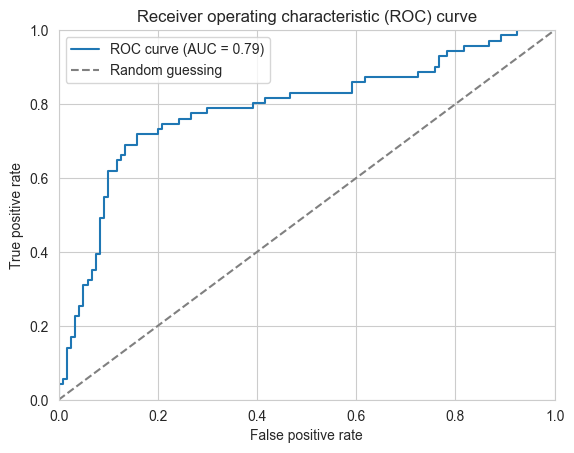

In [39]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
sorted_indices = np.argsort(y_pred)[::-1]
sorted_y_true = y_test[sorted_indices]
cumulative_tp = np.cumsum(sorted_y_true)
cumulative_fp = np.cumsum(1 - sorted_y_true)
tpr = cumulative_tp / cumulative_tp[-1]
fpr = cumulative_fp / cumulative_fp[-1]
thresholds = y_pred[sorted_indices]

# Convert arrays to integer type
sorted_indices = sorted_indices.astype(int)

# Calculate the AUC-ROC score using the trapezoidal rule
auc_roc = np.trapz(tpr, fpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

Inference: From the above output, we can say that area is obtained as 0.78 and it indicates that the model has some ability to distinguish between positive and negative examples. Typically, an AUC score of 0.5 is considered to represent random guessing, while an AUC score of 1.0 represents perfect classification. Therefore, an AUC score of 0.78 is moderately good.